<a href="https://colab.research.google.com/github/ravali217/exploratory-data-analysis/blob/main/3_12_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df=sns.load_dataset('titanic')



print(df.shape)
print(df.info())
df.describe()

(891, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


(891, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None
         survived      pclass         age       sibsp       parc

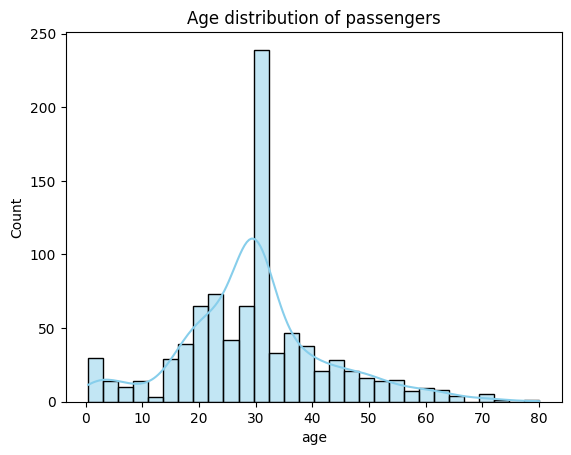

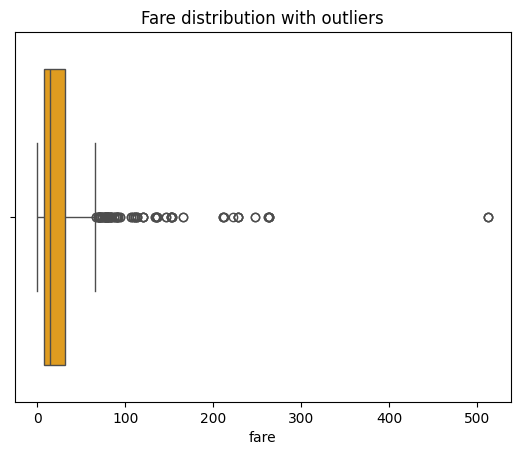

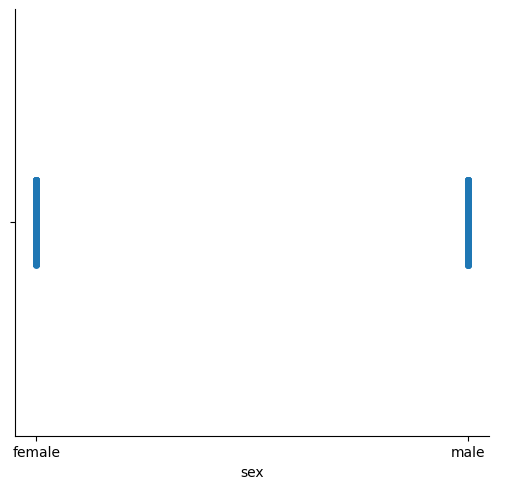

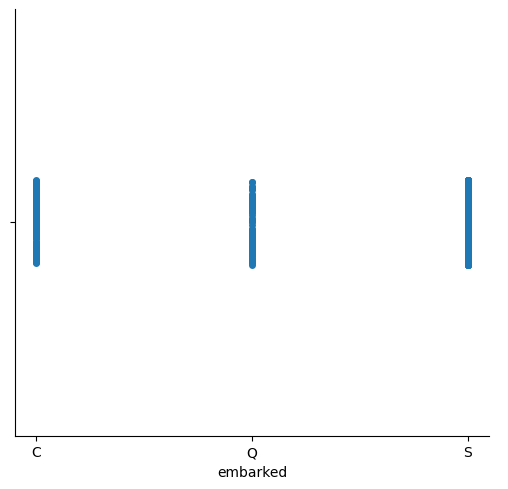

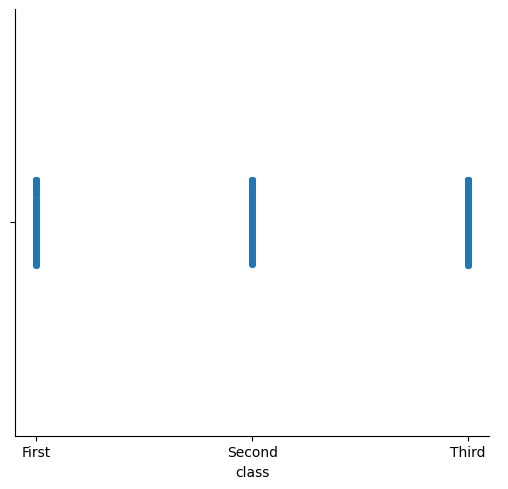

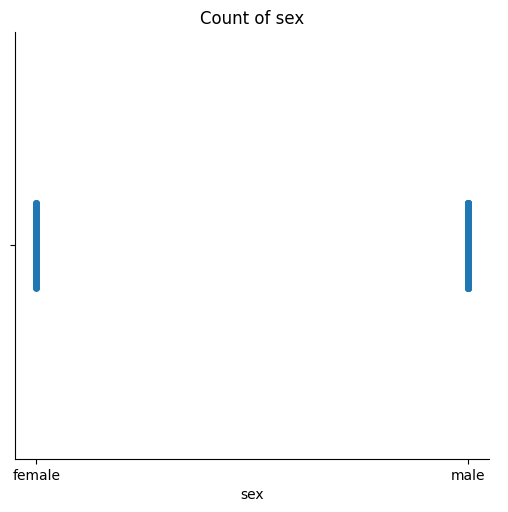

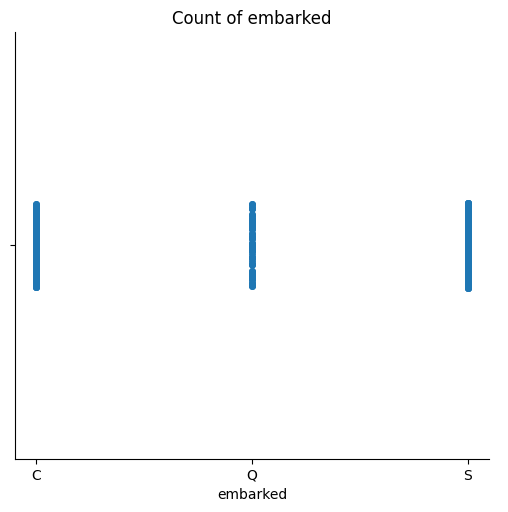

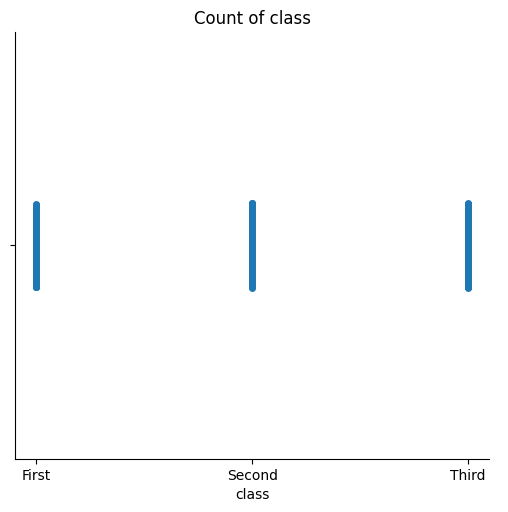

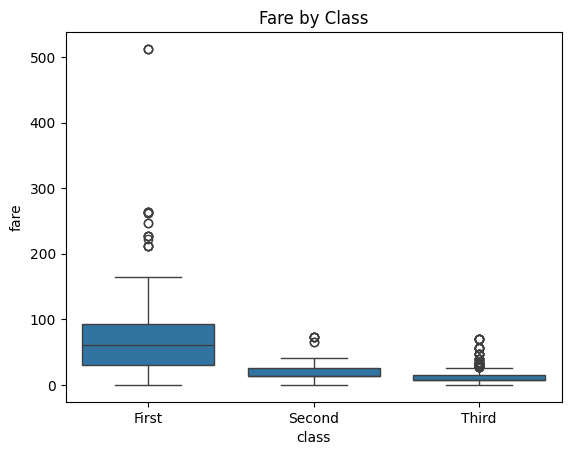

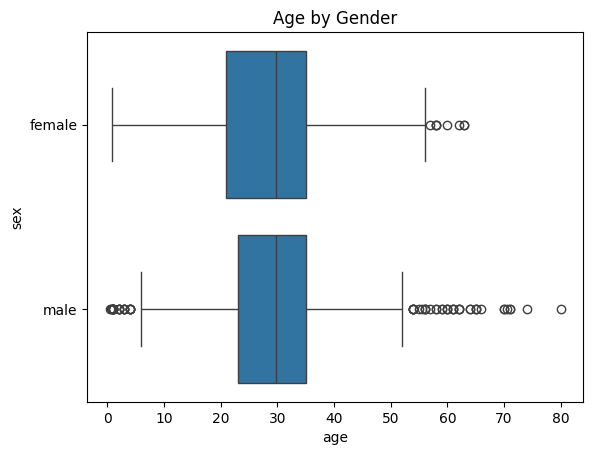

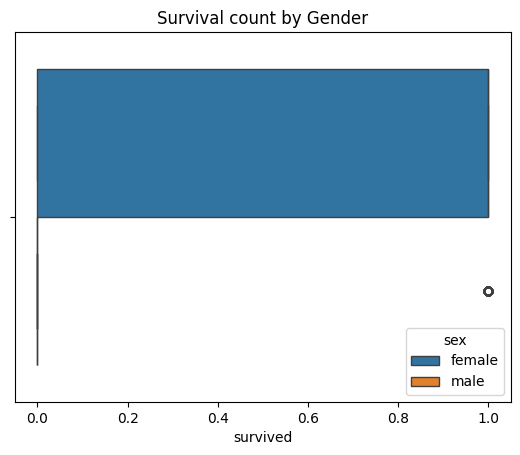

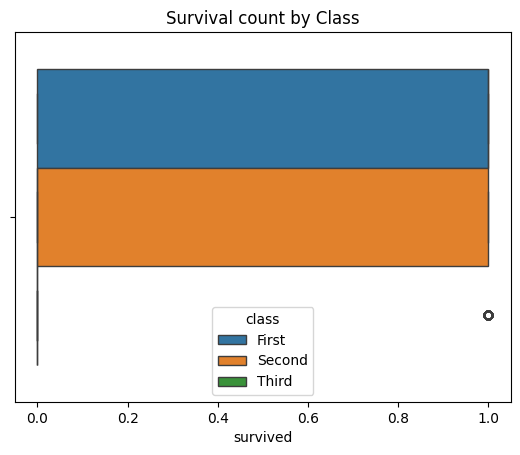

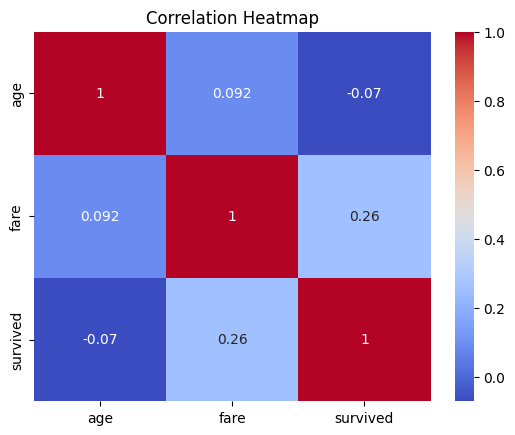

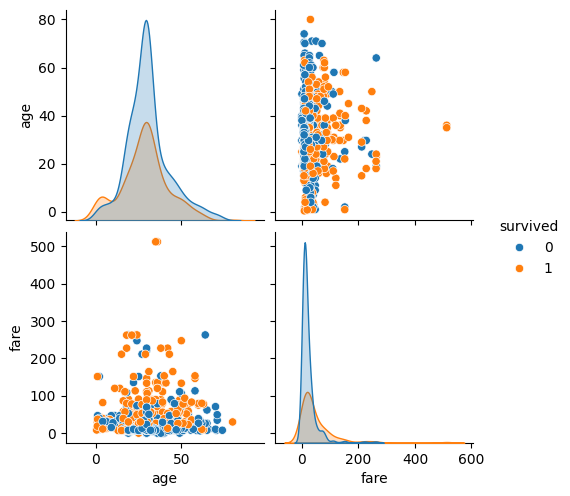

In [ ]:

print(df.shape)
print(df.info())
print(df.describe())

missing=pd.DataFrame({
    'missing_count':df.isnull().sum(),
    'missing_percent':(df.isnull().sum()/len(df))*100

})
missing.sort_values(by='missing_percent',ascending=False)

df['age']=df['age'].fillna(df['age'].mean())

df['embarked']=df['embarked'].fillna(df['embarked'].mode()[0])

df.drop(columns=['deck'],inplace=True)

print("Missing values after cleaning :\n",df.isnull().sum().sum())



#Duplicates and data types check
print("Duplicates rows: ",df.duplicated().sum())



missing=pd.DataFrame({
    'missing_count':df.isnull().sum(),
    'missing_percent':(df.isnull().sum()/len(df))*100

})
missing.sort_values(by='missing_percent',ascending=False)





print("Duplicates rows: ",df.duplicated().sum())
#convert some columns to category type
df['class']=df['class'].astype('category')
df['sex']=df['sex'].astype('category')
df['embarked']=df['embarked'].astype('category')
df.info()




#6.Univariate analysis
num_cols=df.select_dtypes(include=['float64','int64']).columns
df[num_cols].describe()

#Histogram:age
sns.histplot(df['age'],bins=30,kde=True,color='skyblue')
plt.title('Age distribution of passengers')
plt.show()

#Boxplot:fare
sns.boxplot(x=df['fare'],color='orange')
plt.title('Fare distribution with outliers')
plt.show()




#Univariate analysis
cat_clos=df.select_dtypes('category').columns
for col in cat_clos:
  sns.catplot(x=col,data=df)
  plt.show()




#Univariate analysis
cat_clos=df.select_dtypes('category').columns
for col in cat_clos:
  sns.catplot(x=col,data=df)
  plt.title(f"Count of {col}")
  plt.show()




#Bivariate analysis
sns.boxplot(x='class',y='fare',data=df)
plt.title("Fare by Class")
plt.show()
sns.boxplot(x='age',y='sex',data=df)
plt.title("Age by Gender")
plt.show()





#Bivariate analysis categorical vs categorical
sns.boxplot(x='survived',hue='sex',data=df)
plt.title('Survival count by Gender')
plt.show()
sns.boxplot(x='survived',hue='class',data=df)
plt.title('Survival count by Class')
plt.show()





#Corelation and Multivariate analysis
corr=df[['age','fare','survived']].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

sns.pairplot(df[['age','fare','survived']],hue='survived')
plt.show()




In [ ]:
print(df.shape)
print(df.info())
df.describe()


(891, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


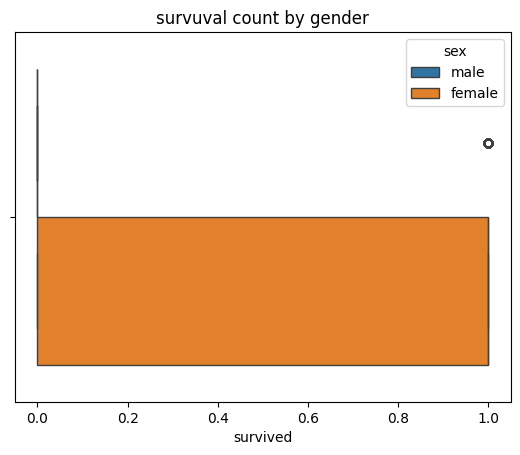

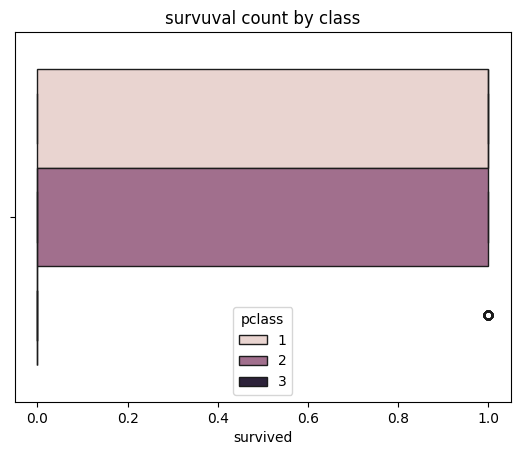

In [ ]:
sns.boxplot(x='survived',hue='sex',data=df)
plt.title("survuval count by gender")
plt.show()
sns.boxplot(x='survived',hue='pclass',data=df)
plt.title("survuval count by class")
plt.show()

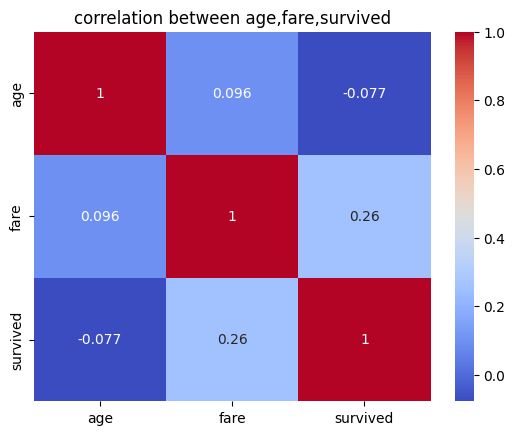

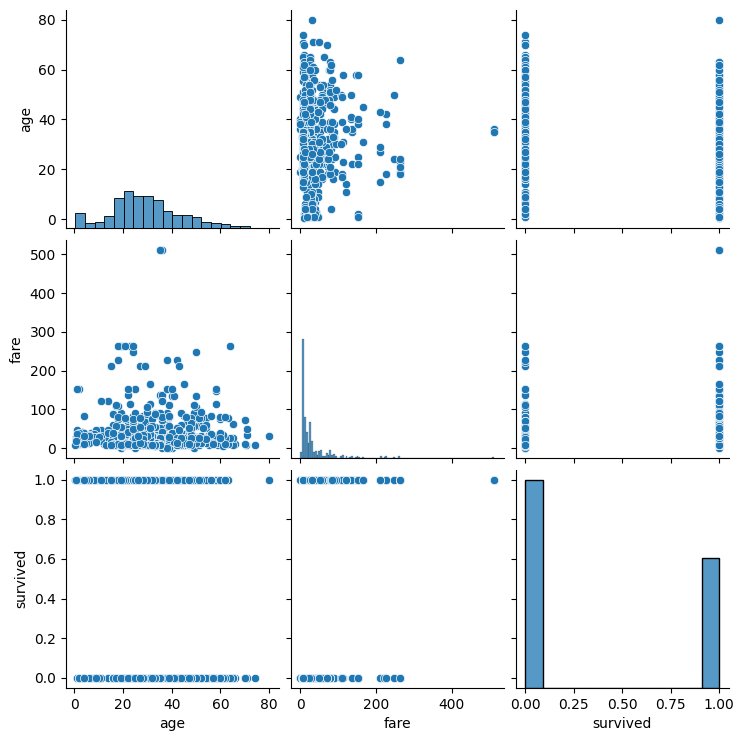

In [ ]:
corr=df[['age','fare','survived']].corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.title("correlation between age,fare,survived")
plt.show()
sns.pairplot(df[['age','fare','survived']])
plt.show()

number of outliers in the fare column: 116


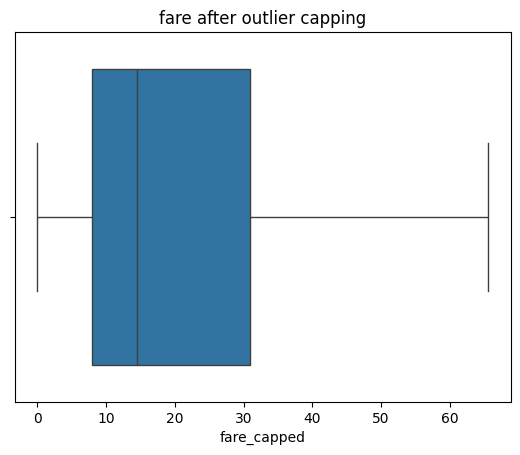

In [ ]:
q1=df['fare'].quantile(0.25)
q3=df['fare'].quantile(0.75)
iqr=q3-q1
lower=q1-1.5*iqr
upper=q3+1.5*iqr
outliers=df[(df['fare']<lower)|(df['fare']>upper)]
print("number of outliers in the fare column:",len(outliers))
df['fare_capped']=df['fare'].clip(lower,upper)
sns.boxplot(x=df['fare_capped'])
plt.title("fare after outlier capping")
plt.show()

In [ ]:
# Cell 1: imports and file paths
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# display settings
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 200)

# replace these paths with where you put the CSVs from the repo
stores_fp = "data/stores.csv"
features_fp = "data/features.csv"       # contains Date, Store, Temperature, Fuel_Price, MarkDown1..5, CPI, Unemployment, IsHoliday
train_fp = "data/train.csv"             # contains Store, Dept, Date, Weekly_Sales, IsHoliday (maybe repeated)
# (some repos also have a test set - not needed for these tasks)


In [ ]:
# Cell 6: Identify column types and lists
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
# Try to detect date columns (string columns called 'Date' or dtypes datetime)
date_cols = [c for c in df.columns if 'date' in c.lower()]  # names containing 'date'
# More robust: check dtype
date_like_cols = [c for c in df.columns if np.issubdtype(df[c].dtype, np.datetime64)]
print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)
print("Columns with 'date' in name:", date_cols)
print("Columns with datetime dtype (if any):", date_like_cols)

# Cell 6: Identify column types and lists
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
# Try to detect date columns (string columns called 'Date' or dtypes datetime)
date_cols = [c for c in df.columns if 'date' in c.lower()]  # names containing 'date'
# More robust: check dtype
date_like_cols = [c for c in df.columns if np.issubdtype(df[c].dtype, np.datetime64)]
print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)
print("Columns with 'date' in name:", date_cols)
print("Columns with datetime dtype (if any):", date_like_cols)


TypeError: Cannot interpret 'CategoricalDtype(categories=['female', 'male'], ordered=False, categories_dtype=object)' as a data type

In [ ]:
# Cell 9: Missing value check
missing = df.isnull().sum().sort_values(ascending=False)
display(missing[missing>0])


,0
embark_town,2


In [ ]:
# Cell 10: Fill missing numeric values:
# Columns to fill: Temperature, Fuel_Price, CPI, Unemployment (use median)
for col in ['Temperature','Fuel_Price','CPI','Unemployment']:
    if col in df.columns:
        median_val = df[col].median()
        df[col] = df[col].fillna(median_val)
        print(f"Filled NaNs in {col} with median = {median_val}")
    else:
        print(f"{col} not in df")


Temperature not in df
Fuel_Price not in df
CPI not in df
Unemployment not in df


In [ ]:
# Cell 11: Fill missing markdown-related fields with mean values
markdown_cols = [c for c in df.columns if 'MarkDown' in c or 'markdown' in c.lower()]
print("Markdown columns detected:", markdown_cols)
for col in markdown_cols:
    mean_val = df[col].mean()
    df[col] = df[col].fillna(mean_val)
    print(f"Filled NaNs in {col} with mean = {mean_val}")


Markdown columns detected: []


In [ ]:
# Cell 12: Convert Date column to datetime format (in-place)
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    print("Converted Date to datetime. Min/Max:", df['Date'].min(), df['Date'].max())
else:
    print("No Date column to convert.")


No Date column to convert.
